In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

**Importing the dataset**

In [2]:
data=pd.read_csv('Social_Network_Ads.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [3]:
data=data.drop('User ID',axis=1)
label_encode=LabelEncoder()
data['Gender']=label_encode.fit_transform(data['Gender'])
data


,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [4]:
x=data[['Gender','Age','EstimatedSalary']]
y=data[['Purchased']]
X_Train,X_Test,y_Train,y_Test=train_test_split(x,y,test_size=0.25,random_state=2)

**Feature Scaling**

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_Train=sc.fit_transform(X_Train)
X_Test=sc.transform(X_Test)

**Fitting K-NN to the Training set**

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_Train,y_Train)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

**Predicting the Test set results**

In [7]:
y_predict=model.predict(X_Test)

**Making the Confusion Matrix**

In [8]:
from sklearn.metrics import confusion_matrix,plot_roc_curve,accuracy_score
cnf_matrix = confusion_matrix(y_Test, model.predict(X_Test))
print(cnf_matrix)
print(accuracy_score(y_Test, model.predict(X_Test)))

[[57  5]
 [ 5 33]]
0.9


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


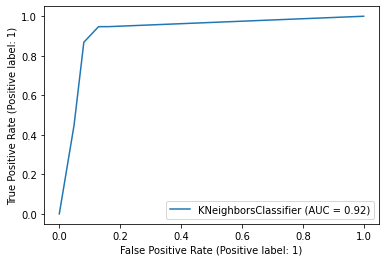

In [9]:
plot_roc_curve(model, X_Test, y_Test)